## **데이터불러오기**

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LassoCV

from tqdm import tqdm

import warnings
warnings.filterwarnings(action='ignore')


In [295]:
train = pd.read_csv('../../Data/데이터정리중/재무변수_부도정상기업컬럼추가.csv')

In [296]:
train = train.fillna(0)
train

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자산총계(요약),유동자산(요약),당좌자산(요약),현금 및 현금성자산(요약),...,기업가치(EV),EBITDA,EBITDA/매출액,EBITDA/금융비용,EBITDA/평균발행주식수,EV/EBITDA,년,key,공시제목,부도
0,(주)CMG제약,58820.0,2000/12,5.0,0,UQ,28990.0,21169.0,10541.0,4330.0,...,0.00,0.00,0.00,0.00,0.00,0.00,2001.0,588202001,0,1
1,(주)CMG제약,58820.0,2001/12,5.0,0,UQ,20908.0,16359.0,2307.0,1829.0,...,0.00,0.00,0.00,0.00,0.00,0.00,2002.0,588202002,0,1
2,(주)CMG제약,58820.0,2002/12,5.0,0,UQ,15401.0,9880.0,1436.0,355.0,...,0.00,0.00,0.00,0.00,0.00,0.00,2003.0,588202003,0,1
3,(주)CMG제약,58820.0,2003/12,5.0,0,UQ,11063.0,8534.0,1083.0,2.0,...,0.00,0.00,0.00,0.00,0.00,0.00,2004.0,588202004,0,1
4,(주)CMG제약,58820.0,2004/12,5.0,0,UQ,5179.0,3893.0,445.0,11.0,...,0.00,0.00,0.00,0.00,0.00,0.00,2005.0,588202005,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,흥구석유(주),24060.0,2016/12,5.0,0,UQ,79137.0,14794.0,12274.0,1440.0,...,55934.79,1348.52,0.94,10.71,89.90,41.48,2017.0,240602017,0,1
27353,흥구석유(주),24060.0,2017/12,5.0,0,UQ,79912.0,15880.0,13124.0,1588.0,...,46036.63,1147.56,0.74,9.02,76.50,40.12,2018.0,240602018,0,1
27354,흥구석유(주),24060.0,2018/12,5.0,0,UQ,75206.0,12515.0,11029.0,4017.0,...,36557.57,1451.79,0.87,16.83,96.79,25.18,2019.0,240602019,0,1
27355,흥구석유(주),24060.0,2019/12,5.0,0,UQ,83661.0,22620.0,19701.0,2318.0,...,78081.78,1009.25,0.67,507.93,67.28,77.37,2020.0,240602020,0,1


In [297]:
##데이터 분리를 위한 컬럼확인
# for col in train.columns: 
#     print(col)

회사명
거래소코드
회계년도
소속코드
상장폐지일
감사의견코드
자산총계(요약)
유동자산(요약)
당좌자산(요약)
현금 및 현금성자산(요약)
단기투자자산(요약)
단기예금(요약)
단기매매증권(요약)
단기대여금(요약)
기타단기투자자산(요약)
매출채권(요약)
*할인어음 또는 배서어음(요약)
기타당좌자산(요약)
재고자산(요약)
상품(요약)
제품(요약)
반제품(요약)
재공품(요약)
원재료(요약)
기타재고자산(요약)
임대주택자산(요약)
비유동자산(요약)
투자자산(요약)
*장기금융상품(요약)
*투자유가증권(장기투자증권)(요약)
유형자산(요약)
토지
건설중인자산
건물
기계장치
차량운반구
렌탈자산
설비자산
무형자산(요약)
기타비유동자산(요약)
이연자산(요약)
부채총계(요약)
유동부채(요약)
매입채무(요약)
단기차입금(요약)
유동성장기부채(요약)
기타유동부채(요약)
비유동부채(요약)
사채(요약)
장기차입금(요약)
제충당금(요약)
기타비유동부채(요약)
이연부채(요약)
자본총계(요약)
자본금(요약)
자본잉여금(요약)
자본조정(요약)
기타포괄손익누계액(요약)
이익잉여금(요약)
*미처분이익잉여금 및 차기이월미처분이익잉여금(요약)
*당기순이익(요약)
부채와자본총계(요약)
매출액(요약)
매출원가(요약)
매출총이익(요약)
판매비와 관리비(요약)
급료
퇴직급여(요약)
복리후생비(요약)
세금과공과(요약)
임차료(요약)
감가상각비
연구비
기타 판매비와 관리비(요약)
영업이익(요약)
영업외수익(요약)
이자수익(요약)
배당금수익(요약)
외환차익(요약)
외화환산이익(요약)
지분법이익(요약)
기타영업외수익(요약)
영업외비용(요약)
이자비용(요약)
외환차손(요약)
외화환산손실(요약)
지분법손실(요약)
기타영업외비용(요약)
법인세비용차감전(계속사업)손익(요약)
(계속사업손익)법인세비용(요약)
계속사업이익(요약)
중단사업이익(요약)
*법인세효과(요약)
당기순이익(요약)
주당계속사업이익(요약)
주당순이익(요약)
희석화주당계속사업이익(요약)
희석화주당순이익(요약)
CPA수정후 당기순이익(요약)
*주당경상이익(2007년

## **B/S+I/S, B/S_ratio 데이터 분리**

In [298]:
# feature select : B/S + I/S
col_1 = train.columns[6:101].values.tolist()
col_1.append('부도')

In [299]:
# feature select : B/S_ratio
col_2 = train.columns[101:267].values.tolist()
col_2.append('부도')

* 데이터가 잘 분리되어 있는지 컬럼 확인

In [300]:
col_1

['자산총계(요약)',
 '유동자산(요약)',
 '당좌자산(요약)',
 '현금 및 현금성자산(요약)',
 '단기투자자산(요약)',
 '단기예금(요약)',
 '단기매매증권(요약)',
 '단기대여금(요약)',
 '기타단기투자자산(요약)',
 '매출채권(요약)',
 '*할인어음 또는 배서어음(요약)',
 '기타당좌자산(요약)',
 '재고자산(요약)',
 '상품(요약)',
 '제품(요약)',
 '반제품(요약)',
 '재공품(요약)',
 '원재료(요약)',
 '기타재고자산(요약)',
 '임대주택자산(요약)',
 '비유동자산(요약)',
 '투자자산(요약)',
 '*장기금융상품(요약)',
 '*투자유가증권(장기투자증권)(요약)',
 '유형자산(요약)',
 '토지',
 '건설중인자산',
 '건물',
 '기계장치',
 '차량운반구',
 '렌탈자산',
 '설비자산',
 '무형자산(요약)',
 '기타비유동자산(요약)',
 '이연자산(요약)',
 '부채총계(요약)',
 '유동부채(요약)',
 '매입채무(요약)',
 '단기차입금(요약)',
 '유동성장기부채(요약)',
 '기타유동부채(요약)',
 '비유동부채(요약)',
 '사채(요약)',
 '장기차입금(요약)',
 '제충당금(요약)',
 '기타비유동부채(요약)',
 '이연부채(요약)',
 '자본총계(요약)',
 '자본금(요약)',
 '자본잉여금(요약)',
 '자본조정(요약)',
 '기타포괄손익누계액(요약)',
 '이익잉여금(요약)',
 '*미처분이익잉여금 및 차기이월미처분이익잉여금(요약)',
 '*당기순이익(요약)',
 '부채와자본총계(요약)',
 '매출액(요약)',
 '매출원가(요약)',
 '매출총이익(요약)',
 '판매비와 관리비(요약)',
 '급료',
 '퇴직급여(요약)',
 '복리후생비(요약)',
 '세금과공과(요약)',
 '임차료(요약)',
 '감가상각비',
 '연구비',
 '기타 판매비와 관리비(요약)',
 '영업이익(요약)',
 '영업외수익(요약)',
 '이자수익(요약)',
 '배당금수익(요약)',
 '외환차익(요약)',

In [301]:
col_2

['총자본증가율',
 '유형자산증가율',
 '유동자산증가율',
 '영업이익증가율',
 '경상이익증가율 (2007년 이전 발생)',
 '순이익증가율',
 '재고자산증가율',
 '자기자본증가율',
 '매출액증가율',
 '종업원1인당 부가가치증가율',
 '종업원수증가율',
 '비유동자산증가율',
 '종업원1인당 매출액증가율',
 '종업원1인당 인건비증가율',
 '매출액총이익률',
 '매출액영업이익률',
 '매출액경상이익률 (2007년 이전 발생)',
 '매출액순이익률',
 '총자본사업이익률',
 '총자본영업이익률',
 '총자본경상이익률 (2007년 이전 발생)',
 '총자본순이익률',
 '자기자본영업이익률',
 '자기자본경상이익률 (2007년 이전 발생)',
 '자기자본순이익률',
 '자본금영업이익률',
 '자본금경상이익률 (2007년 이전 발생)',
 '자본금순이익률',
 '조세 대 조세차감전순이익률',
 '기업경상이익률 (2007년 이전 발생)',
 '투자수익률 (2007년 이전 발생)',
 '기업순이익률',
 '경영자본영업이익률',
 '경영자본순이익률',
 '매출원가 대 매출액비율',
 '영업비율',
 '영업외손익률',
 '금융비용부담률',
 '외환이익 대 매출액비율',
 '광고선전비 대 매출액비율',
 '수지비율',
 '인건비 대 총비용비율',
 '조세공과 대 총비용비율',
 '금융비용 대 총비용비율',
 '감가상각비 대 총비용비율',
 '감가상각률',
 '누적감가상각률',
 '이자부담률',
 '지급이자율',
 '차입금평균이자율',
 '사내유보율',
 '사내유보 대 자기자본비율',
 '적립금비율(재정비율)',
 '평균배당률',
 '자기자본배당률',
 '배당성향',
 '1주당매출액',
 'EPS(Earning Per Share)',
 '1주당경상이익 (2007년 이전 발생)',
 'CPS(Cash flow Per Share)',
 'BPS(Book-value Per Share)',
 '유보율',
 'R & D 투자효율',
 '1주당영업이익',
 '유동자산구성비

* B/S+I/S, B/S_ratio 데이터 테이블 분리

In [302]:
subset_1 = train[col_1]

In [303]:
subset_2 = train[col_2]

In [304]:
X1 = subset_1.drop('부도', axis=1)
y1 = subset_1['부도']

X2 = subset_2.drop('부도', axis=1)
y2 = subset_2['부도']

In [94]:
print(X1.shape, X2.shape)

(27357, 95) (27357, 166)


## **SVC + LASSO**
- SVC을 기반으로 Lasso featrue selection 을 통해 유의미한 변수 추출
- modle_1 : B/S + I/S 데이터  
- model_2 : B/S_ratio 데이터 

In [305]:
#B/S + I/S
# 매개 변수 C는 희소성을 제어. C가 작을수록 선택된 기능이 줄어듬
# 알파 매개 변수가 높을수록 기능이 적게 선택된 올가미를 사용
lsvc_1 = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X1, y1)
model_1 = SelectFromModel(lsvc_1, prefit=False, max_features=20)
model_1.fit(X1, y1)
X_new_1 = model_1.transform(X1)
print(X_new_1.shape)

print("===========")

#B/S_ratio
lsvc_2 = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X2, y2)
model_2 = SelectFromModel(lsvc_2, prefit=False, max_features=20)
model_2.fit(X2, y2)
X_new_2 = model_2.transform(X2)
print(X_new_2.shape)


(27357, 20)
(27357, 20)


In [306]:
cols_1 = np.array(subset_1.columns[:-1])
cef_1 = model_1.estimator_.coef_[0]

cols_2 = np.array(subset_2.columns[:-1])
cef_2 = model_2.estimator_.coef_[0]

In [307]:
samples_1 = np.array([cols_1.tolist(), cef_1.tolist()]).transpose()
print(samples_1.shape)
print("===========")
samples_2 = np.array([cols_2.tolist(), cef_2.tolist()]).transpose()
print(samples_2.shape)

(95, 2)
(166, 2)


#### B/S + I/S

In [308]:
lasso_df_1 = pd.DataFrame(model_1.estimator_.coef_, columns= [cols_1.tolist()])
lasso_df_1

,자산총계(요약),유동자산(요약),당좌자산(요약),현금 및 현금성자산(요약),단기투자자산(요약),단기예금(요약),단기매매증권(요약),단기대여금(요약),기타단기투자자산(요약),매출채권(요약),...,중단사업이익(요약),*법인세효과(요약),당기순이익(요약),주당계속사업이익(요약),주당순이익(요약),희석화주당계속사업이익(요약),희석화주당순이익(요약),CPA수정후 당기순이익(요약),*주당경상이익(2007년 이전 발생)(요약),*희석화주당경상이익(2007년 이전 발생)(요약)
0,0.000002,0.000004,-0.000001,0.000002,0.000008,-0.000004,0.000001,-0.00002,-0.000008,-0.000006,...,0.000015,-4.860431e-08,0.000003,-0.000002,0.000002,0.000154,0.0,-0.000002,-0.000001,-0.000003


In [309]:
subset_las_1 = lasso_df_1[model_1.get_feature_names_out().tolist()].transpose()
subset_las_1

,0
단기대여금(요약),-0.000020
제품(요약),-0.000020
반제품(요약),0.000105
원재료(요약),-0.000023
기타재고자산(요약),-0.000025
*장기금융상품(요약),0.000045
렌탈자산,0.000022
기타비유동자산(요약),0.000018
제충당금(요약),0.000026
판매비와 관리비(요약),-0.000018


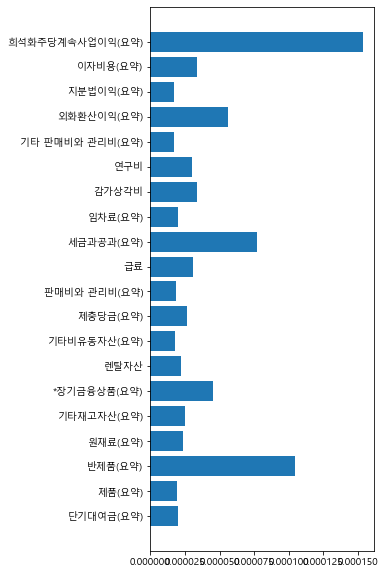

In [310]:
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['figure.figsize'] = (4, 10)

plt.barh(width= abs(subset_las_1[0].values), y= model_1.get_feature_names_out())
plt.show()

* B/S+I/S에서 선별된 feature 간 correlation 살펴보기

<AxesSubplot:title={'center':'Correlation of Features : B/S + I/S'}>

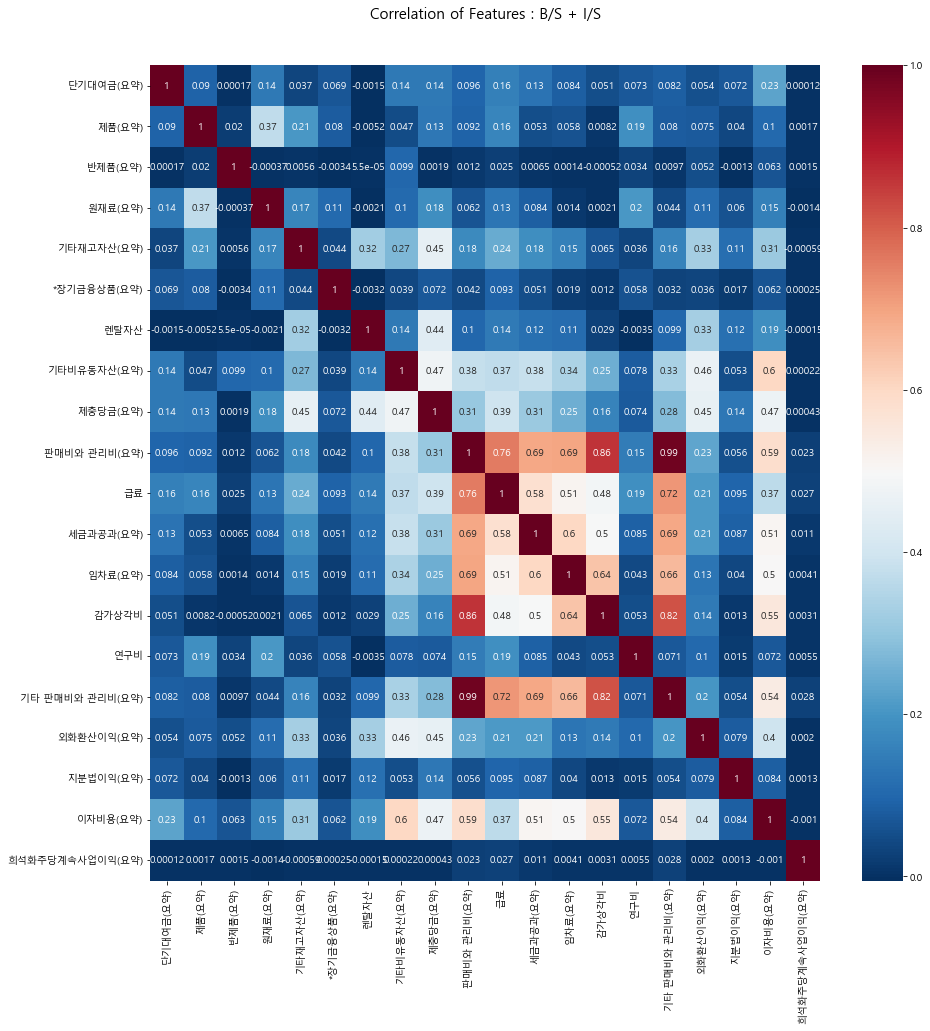

In [311]:
cor1 = train[model_1.get_feature_names_out()].corr()
plt.rcParams['figure.figsize'] = (15, 15)
plt.title("Correlation of Features : B/S + I/S", y = 1.05, size = 15)
sns.heatmap(cor1, cmap = 'RdBu_r', linecolor = "white", annot = True, annot_kws = {"size" : 10})

#### B/S_ratio

In [312]:
lasso_df_2 = pd.DataFrame(model_2.estimator_.coef_, columns= [cols_2.tolist()])
lasso_df_2

,총자본증가율,유형자산증가율,유동자산증가율,영업이익증가율,경상이익증가율 (2007년 이전 발생),순이익증가율,재고자산증가율,자기자본증가율,매출액증가율,종업원1인당 부가가치증가율,...,PCR(Price cash-flow ratio)(최고),PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV),EBITDA,EBITDA/매출액,EBITDA/금융비용,EBITDA/평균발행주식수,EV/EBITDA
0,-0.000111,-1.075371e-07,-0.000013,0.000021,-0.000026,-5.719331e-07,7.053362e-08,-0.000021,0.000201,0.000003,...,-0.000025,0.000055,-0.000235,0.006147,9.784590e-09,0.000007,0.000578,-3.456815e-08,-2.690462e-07,-0.00001


In [313]:
subset_las_2 = lasso_df_2[model_2.get_feature_names_out().tolist()].transpose()
subset_las_2

,0
매출액총이익률,-0.003108
총자본경상이익률 (2007년 이전 발생),-0.001306
기업경상이익률 (2007년 이전 발생),0.003044
경영자본영업이익률,0.002071
매출원가 대 매출액비율,-0.002453
광고선전비 대 매출액비율,0.003507
인건비 대 총비용비율,0.001928
금융비용 대 총비용비율,-0.006541
감가상각비 대 총비용비율,0.008818
사내유보율,0.001559


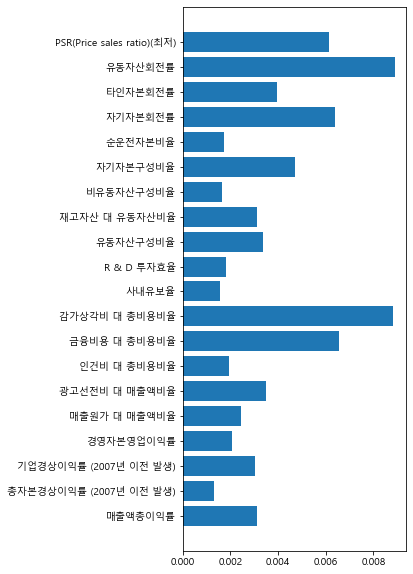

In [314]:
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['figure.figsize'] = (4, 10)

plt.barh(width= abs(subset_las_2[0].values), y= model_2.get_feature_names_out())
plt.show()

* B/S_ration 에서 선별된 feature 간 correlation 살펴보기

<AxesSubplot:title={'center':'Correlation of Features : B/S_ratio'}>

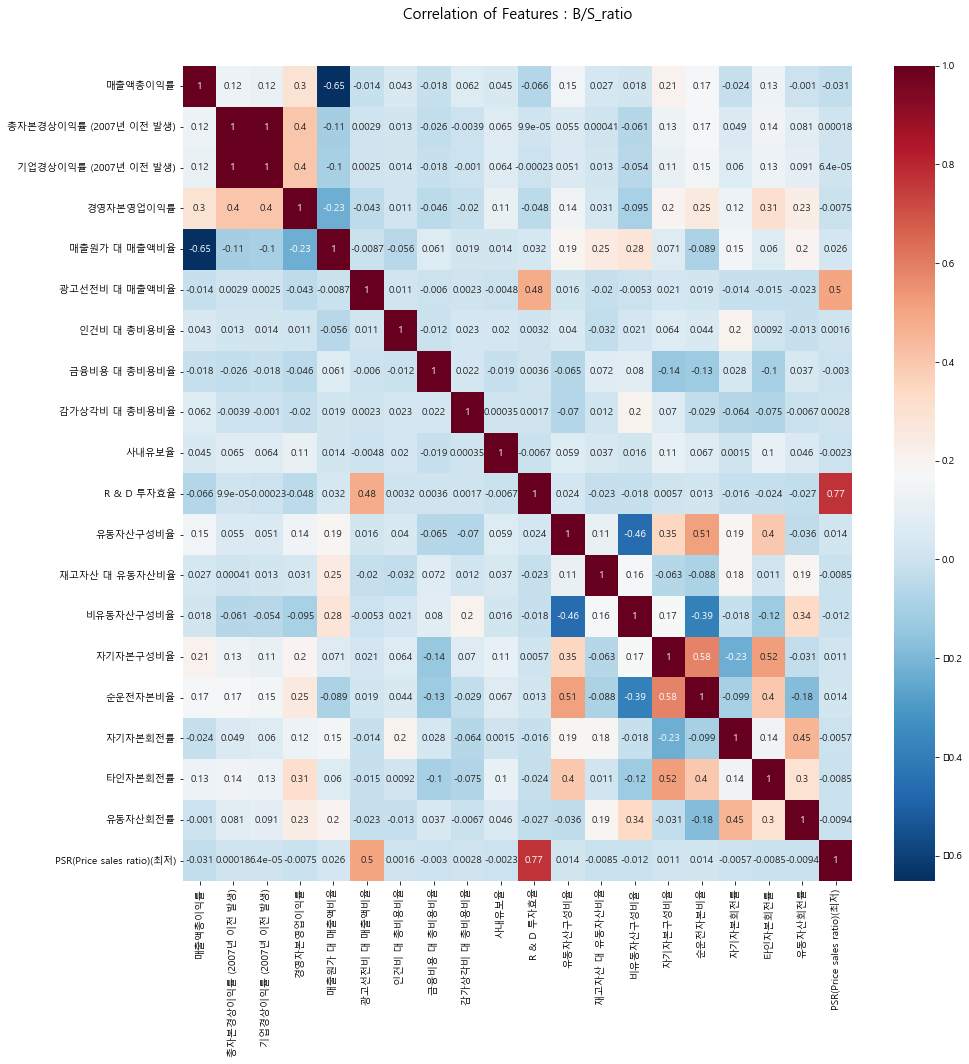

In [315]:
cor2 = train[model_2.get_feature_names_out()].corr()
plt.rcParams['figure.figsize'] = (15, 15)
plt.title("Correlation of Features : B/S_ratio", y = 1.05, size = 15)
sns.heatmap(cor2, cmap = 'RdBu_r', linecolor = "white", annot = True, annot_kws = {"size" : 10})

## **SVC + ANOVA**
- SVC을 기반으로 ANOVA featrue selection 을 통해 유의미한 변수 추출
- modle_3 : B/S + I/S 데이터  
- model_4 : B/S_ratio 데이터

In [316]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [323]:
#B/S + I/S
# SelectPercentile 은 사용자 지정 최고 점수의 기능을 제외한 모든 기능을 제거
anova_1 = SelectPercentile(f_classif).fit(X1,y1)
model_3 = SelectFromModel(anova_1, importance_getter='pvalues_', prefit=False).fit(X1,y1) 
X_new_3 = model_3.transform(X1)
print(X_new_3.shape)

print("===========")

#B/S_ratio
anova_2 = SelectPercentile(f_classif).fit(X2,y2)
model_4 = SelectFromModel(anova_2, importance_getter='pvalues_', prefit=False).fit(X2,y2)
X_new_4 = model_4.transform(X2)
print(X_new_4.shape)


(27357, 30)
(27357, 64)


* pvlaues_ 외의 scores_를 사용해서도 추출 가능
- 총 11개의 변수 추출 가능 

In [322]:
#model_3.get_feature_names_out() # scores_

array(['자본총계(요약)', '이익잉여금(요약)', '*미처분이익잉여금 및 차기이월미처분이익잉여금(요약)',
       '*당기순이익(요약)', '영업이익(요약)', '영업외비용(요약)', '기타영업외비용(요약)',
       '법인세비용차감전(계속사업)손익(요약)', '계속사업이익(요약)', '당기순이익(요약)',
       'CPA수정후 당기순이익(요약)'], dtype=object)

In [320]:
#model_3.get_feature_names_out() # pvalues_

array(['반제품(요약)', '원재료(요약)', '임대주택자산(요약)', '기계장치', '차량운반구', '렌탈자산',
       '설비자산', '이연자산(요약)', '부채총계(요약)', '매입채무(요약)', '비유동부채(요약)', '사채(요약)',
       '장기차입금(요약)', '기타비유동부채(요약)', '이연부채(요약)', '자본금(요약)', '자본조정(요약)',
       '기타포괄손익누계액(요약)', '세금과공과(요약)', '임차료(요약)', '감가상각비',
       '기타 판매비와 관리비(요약)', '영업외수익(요약)', '외환차익(요약)', '지분법이익(요약)',
       '외화환산손실(요약)', '*법인세효과(요약)', '희석화주당계속사업이익(요약)', '희석화주당순이익(요약)',
       '*주당경상이익(2007년 이전 발생)(요약)'], dtype=object)

* 

In [324]:
cols_3 = np.array(subset_1.columns[:-1])
cef_3 = model_3.estimator_.pvalues_

cols_4 = np.array(subset_2.columns[:-1])
cef_4 = model_4.estimator_.pvalues_

In [325]:
samples_3 = np.array([cols_3.tolist(), cef_3.tolist()]).transpose()
print(samples_3.shape)
print("===========")
samples_4 = np.array([cols_4.tolist(), cef_4.tolist()]).transpose()
print(samples_4.shape)

(95, 2)
(166, 2)


#### B/S + I/S

In [329]:
anova_df_1 = pd.DataFrame(model_3.estimator_.pvalues_, index = cols_3.tolist()).T
anova_df_1

,자산총계(요약),유동자산(요약),당좌자산(요약),현금 및 현금성자산(요약),단기투자자산(요약),단기예금(요약),단기매매증권(요약),단기대여금(요약),기타단기투자자산(요약),매출채권(요약),...,중단사업이익(요약),*법인세효과(요약),당기순이익(요약),주당계속사업이익(요약),주당순이익(요약),희석화주당계속사업이익(요약),희석화주당순이익(요약),CPA수정후 당기순이익(요약),*주당경상이익(2007년 이전 발생)(요약),*희석화주당경상이익(2007년 이전 발생)(요약)
0,0.000144,0.000004,0.000007,2.969073e-10,0.000005,6.503886e-08,0.016099,3.885686e-07,0.005279,0.000093,...,0.077151,0.891126,1.481355e-124,0.000919,0.007476,0.267493,0.224903,7.114700e-76,0.38328,0.101841


In [332]:
# 선별된 총 30개의 p-value 값들을 내림차순으로 정렬
subset_ano_1 = anova_df_1[model_3.get_feature_names_out().tolist()].transpose().sort_values(by=[0])
subset_ano_1

,0
지분법이익(요약),0.161914
비유동부채(요약),0.168367
영업외수익(요약),0.169494
자본금(요약),0.174707
기계장치,0.180999
부채총계(요약),0.199268
원재료(요약),0.205628
희석화주당순이익(요약),0.224903
희석화주당계속사업이익(요약),0.267493
기타비유동부채(요약),0.307798


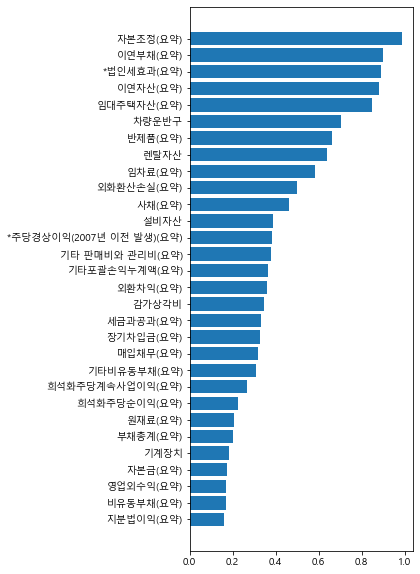

In [331]:
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['figure.figsize'] = (4, 10)

plt.barh(width = abs(subset_ano_1[0].values), y = subset_ano_1.index)
plt.show()

* B/S + I/S 에서 선별된 feature 간 correlation 살펴보기

<AxesSubplot:title={'center':'Correlation of Features : ANOVA B/S + I/S'}>

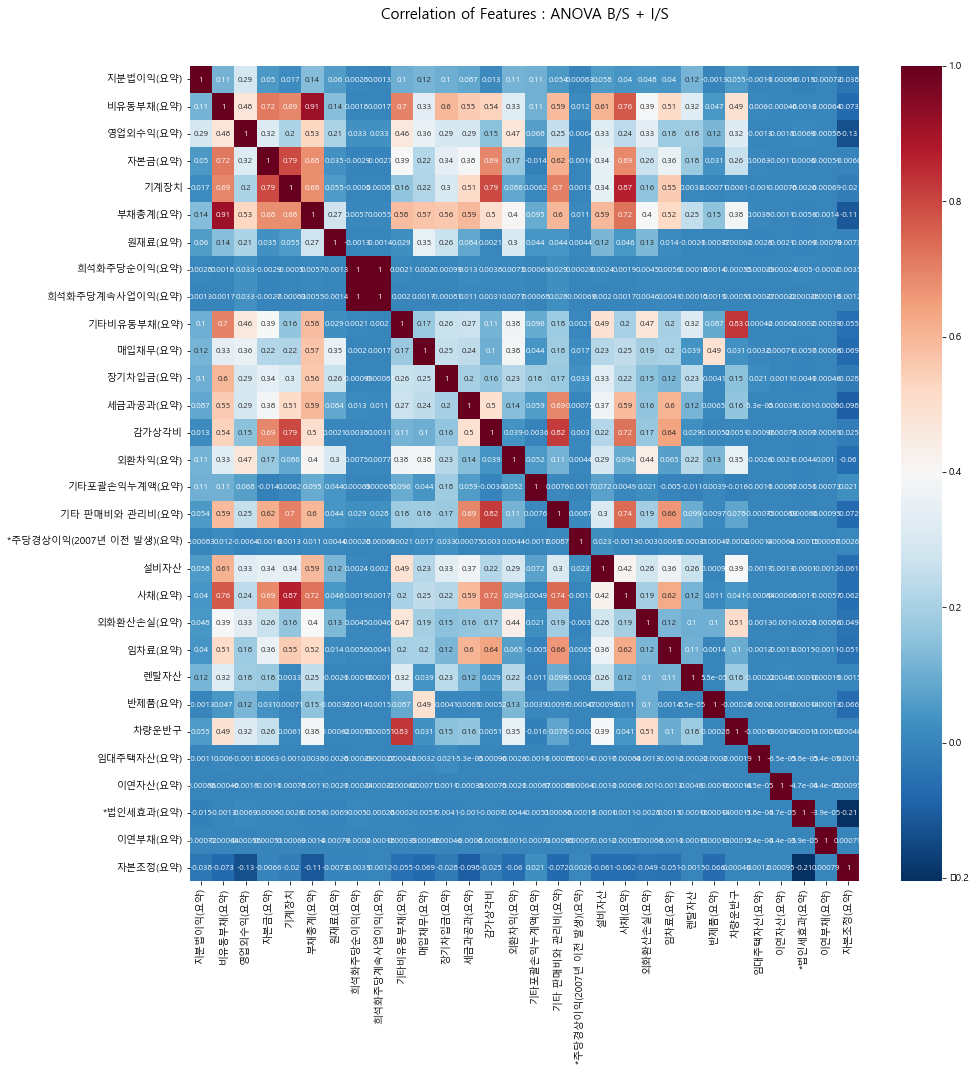

In [333]:
cor3 = train[subset_ano_1.index].corr()
plt.rcParams['figure.figsize'] = (15, 15)
plt.title("Correlation of Features : ANOVA B/S + I/S", y = 1.05, size = 15)
sns.heatmap(cor3, cmap = 'RdBu_r', linecolor = "white", annot = True, annot_kws = {"size" : 8})

#### B/S_ratio

In [334]:
anova_df_2 = pd.DataFrame(model_4.estimator_.pvalues_, index = cols_4.tolist()).T
anova_df_2

,총자본증가율,유형자산증가율,유동자산증가율,영업이익증가율,경상이익증가율 (2007년 이전 발생),순이익증가율,재고자산증가율,자기자본증가율,매출액증가율,종업원1인당 부가가치증가율,...,PCR(Price cash-flow ratio)(최고),PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV),EBITDA,EBITDA/매출액,EBITDA/금융비용,EBITDA/평균발행주식수,EV/EBITDA
0,1.523814e-10,0.953825,0.2957,0.156289,0.256843,0.442585,0.901177,0.245288,0.539675,1.454889e-28,...,0.791378,0.941453,0.001274,0.935551,0.081339,1.433930e-33,0.984895,0.605502,0.863463,0.754781


In [336]:
# 선별된 총 64개의 p-value 값들을 내림차순으로 정렬
subset_ano_2 = anova_df_2[model_4.get_feature_names_out().tolist()].transpose().sort_values(by=[0]) #head(30)
subset_ano_2

,0
이윤분배율,0.294243
유동자산증가율,0.295700
배당성향,0.320600
1주당경상이익 (2007년 이전 발생),0.346076
영업외손익률,0.365925
...,...
PCR(Price cash-flow ratio)(최저),0.941453
유형자산증가율,0.953825
조세 대 조세차감전순이익률,0.963057
EBITDA/매출액,0.984895


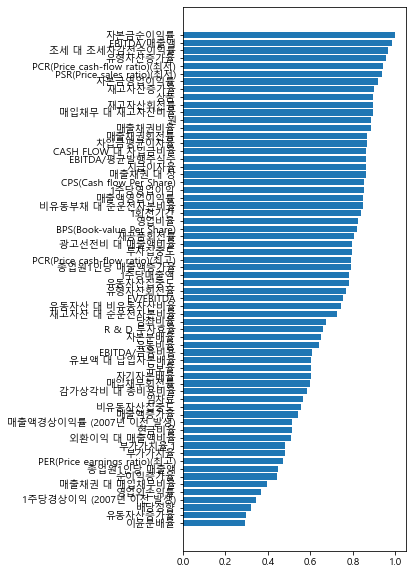

In [337]:
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['figure.figsize'] = (4, 10)

plt.barh(width = abs(subset_ano_2[0].values), y = subset_ano_2.index)
plt.show()

* B/S_ration 에서 선별된 feature 간 correlation 살펴보기

<AxesSubplot:title={'center':'Correlation of Features : ANOVA B/S_ratio'}>

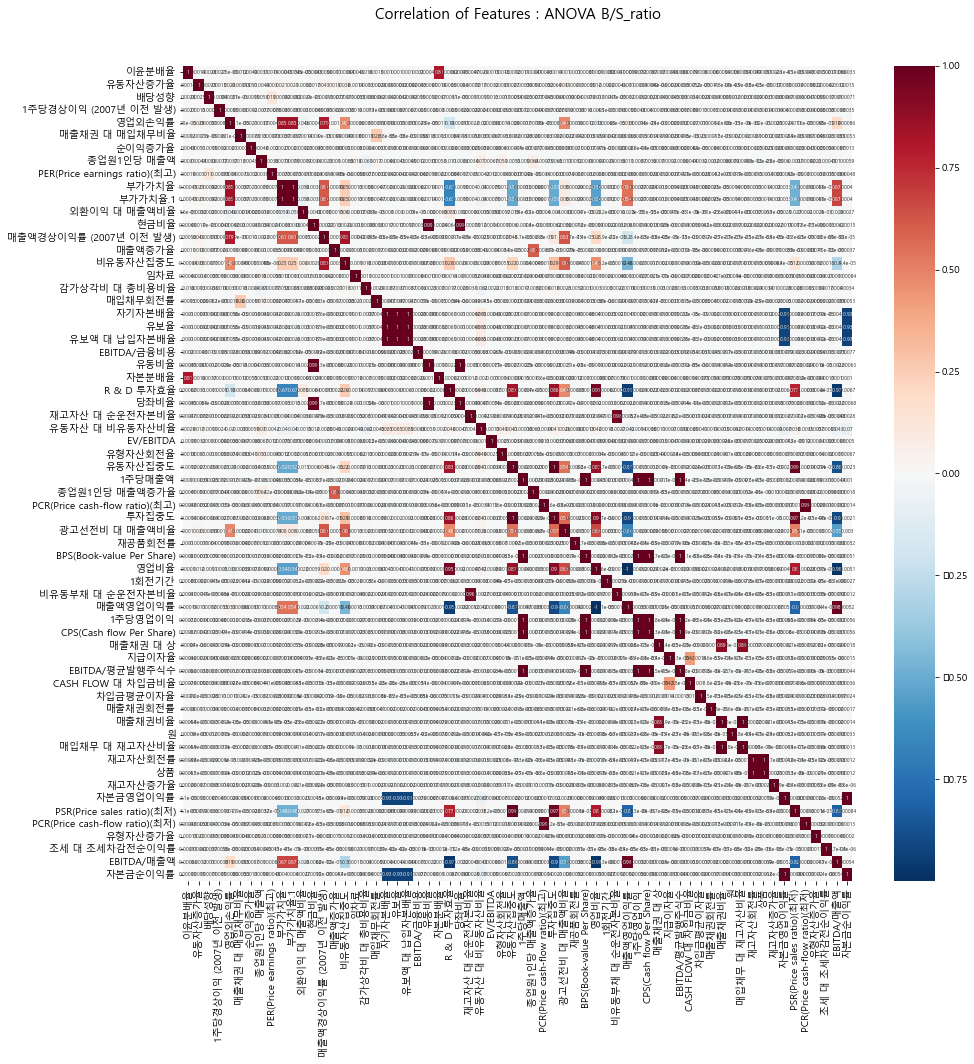

In [338]:
cor4 = train[subset_ano_2.index].corr()
plt.rcParams['figure.figsize'] = (15, 15)
plt.title("Correlation of Features : ANOVA B/S_ratio", y = 1.05, size = 15)
sns.heatmap(cor4, cmap = 'RdBu_r', linecolor = "white", annot = True, annot_kws = {"size" : 5})